In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
X = df.drop('label', axis = 1)
y = df['label'].copy()

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
spliter = StratifiedShuffleSplit(test_size = 0.5, n_splits = 3, random_state = 28)

In [7]:
for train_index, test_index in spliter.split(X, y):
    strat_train_x = X.loc[train_index]
    strat_train_y = y.loc[train_index]
    strat_test_x = X.loc[test_index]
    strat_test_y = y.loc[test_index]

In [8]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [9]:
# sgd_clf = SGDClassifier()
# cross_val_score(sgd_clf, strat_train_x, strat_train_y, cv = 3, scoring = 'accuracy')

# array([0.87048408, 0.87330381, 0.87650086])

In [10]:
# forest_clf = RandomForestClassifier()
# cross_val_score(forest_clf, strat_train_x, strat_train_y, cv = 3, scoring = 'accuracy')

# array([0.91403684, 0.91972575, 0.91623785])

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()
scale_train_x = scale.fit_transform(strat_train_x)
scale_test_x = scale.transform(strat_test_x)

Image 1


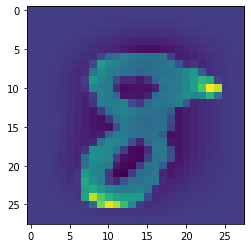

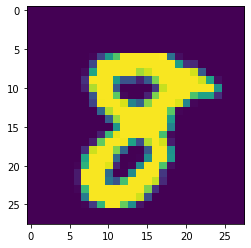

Image 2


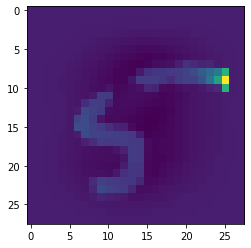

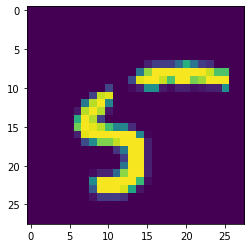

Image 3


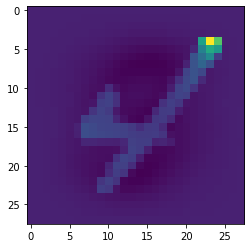

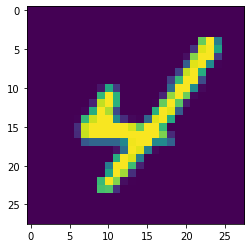

Image 4


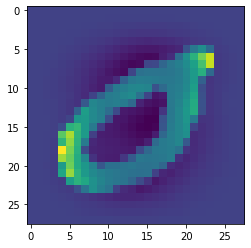

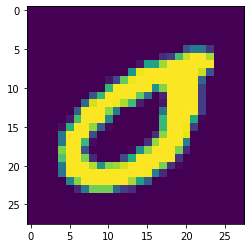

Image 5


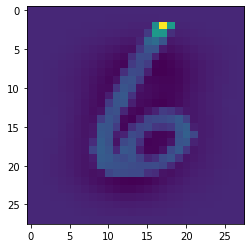

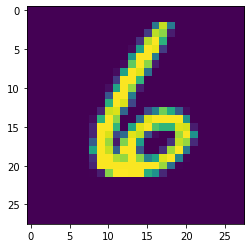

Image 6


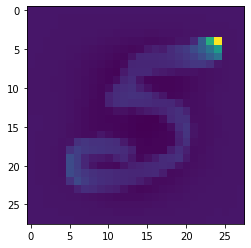

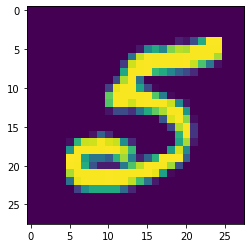

Image 7


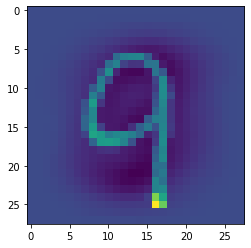

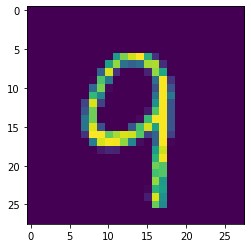

Image 8


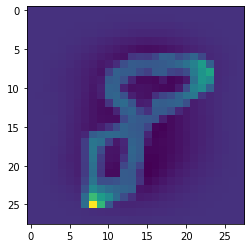

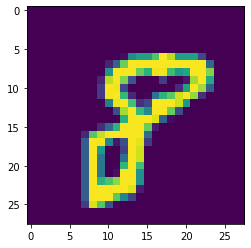

Image 9


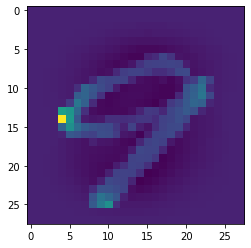

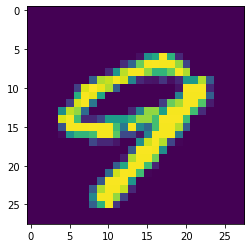

Image 10


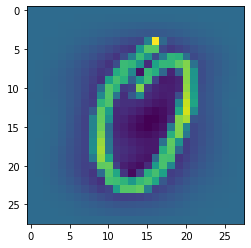

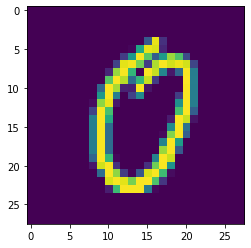

In [13]:
for i in range(10):
    print('Image', i+1)
    plt.imshow(scale_train_x[i].reshape(28, 28))
    plt.show()
    plt.imshow(strat_train_x.values[i].reshape(28, 28))
    plt.show()

Image 0


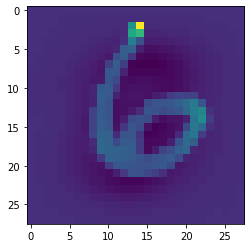

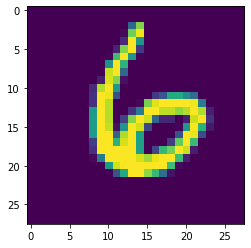

Image 1


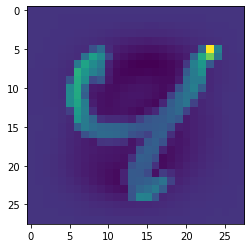

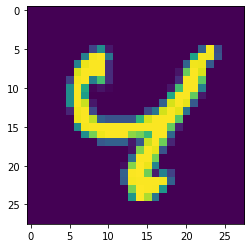

Image 2


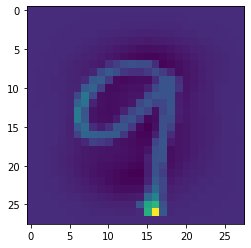

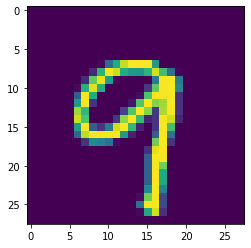

Image 3


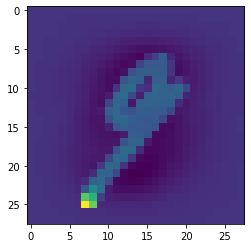

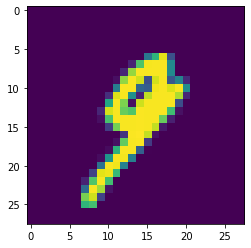

Image 4


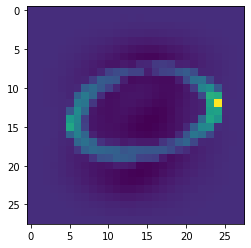

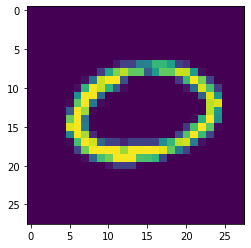

Image 5


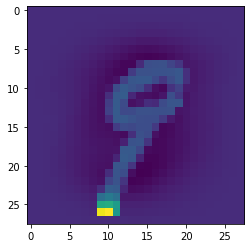

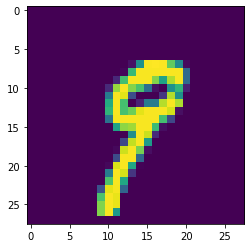

Image 6


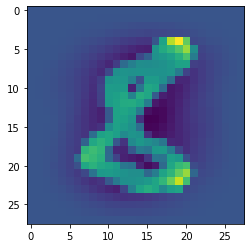

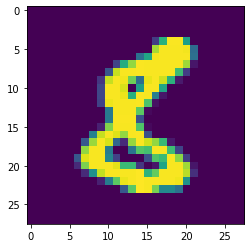

Image 7


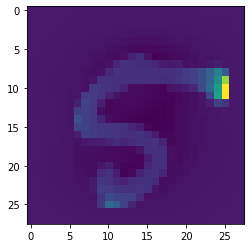

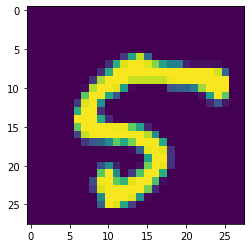

Image 8


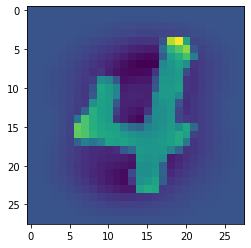

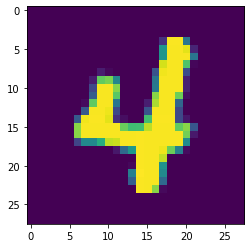

Image 9


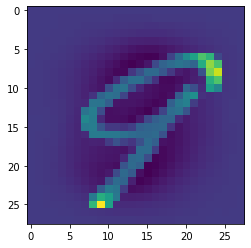

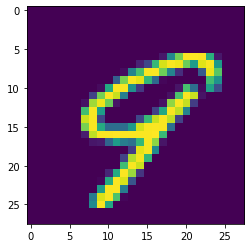

In [14]:
for i in range(10):
    print('Image', i)
    plt.imshow(scale_test_x[i].reshape(28, 28))
    plt.show()
    plt.imshow(strat_test_x.values[i].reshape(28, 28))
    plt.show()

In [15]:
# cross_val_score(sgd_clf, scale_train_x, strat_train_y, cv = 3, scoring = 'accuracy')

# array([0.90061402, 0.9062991 , 0.90566038])

In [16]:
# cross_val_score(forest_clf, scale_train_x, strat_train_y, cv = 3, scoring = 'accuracy')

# array([0.91674996, 0.923011  , 0.92438536])

In [17]:
# ovr = OneVsRestClassifier(sgd_clf)
# ovr.fit(strat_train_x, strat_train_y)

In [18]:
# len(ovr.estimators_)

In [19]:
# ovo = OneVsOneClassifier(sgd_clf)
# ovo.fit(strat_train_x, strat_train_y)

In [20]:
# len(ovo.estimators_)

In [21]:
# ovo.score(strat_test_x, strat_test_y)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [23]:
forest_clf = RandomForestClassifier()

In [24]:
y_pred = cross_val_predict(forest_clf, scale_train_x, strat_train_y,
                          cv = 3)

In [25]:
conf_mat = confusion_matrix(strat_train_y, y_pred)

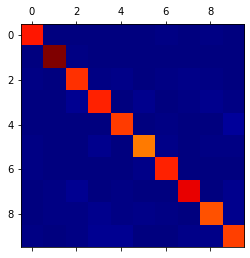

In [26]:
plt.matshow(conf_mat, cmap = plt.cm.jet)

In [27]:
row_sum = conf_mat.sum(axis = 1, keepdims = True)

In [28]:
norm_conf_mat = conf_mat/row_sum

In [29]:
np.fill_diagonal(norm_conf_mat, 0)

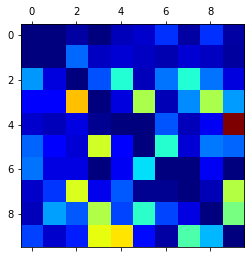

In [30]:
plt.matshow(norm_conf_mat, cmap = plt.cm.jet)

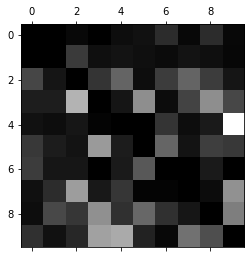

In [31]:
plt.matshow(norm_conf_mat, cmap = plt.cm.gray)

In [32]:
cl_a, cl_b = 3, 5

x_aa = strat_train_x[(strat_train_y == cl_a) & (y_pred == cl_a)]
x_ab = strat_train_x[(strat_train_y == cl_a) & (y_pred == cl_b)]
x_ba = strat_train_x[(strat_train_y == cl_b) & (y_pred == cl_a)]
x_bb = strat_train_x[(strat_train_y == cl_b) & (y_pred == cl_b)]

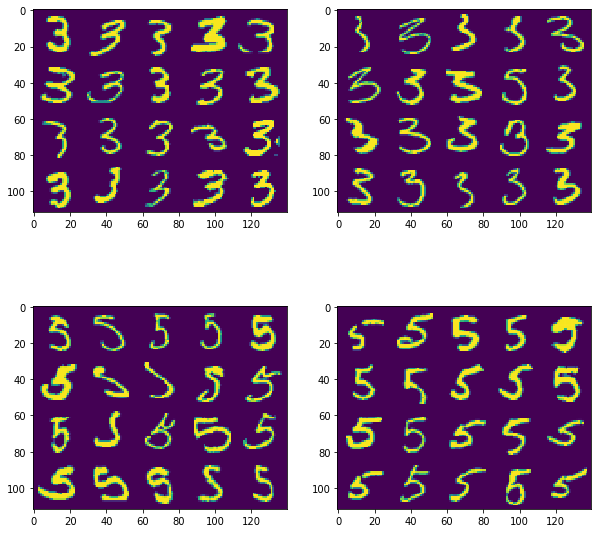

In [33]:
fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

def marge_img(X, axs):
    X = X.values
    
    tmp_img = None
    tmp_row = None
    
    r = 0
    for i in range(25):
        x = X[i].reshape(28, 28)
        if type(tmp_row) == type(None):
            tmp_row = x.copy()
            r += 1
        elif r == 5:
            if type(tmp_img) == type(None):
                tmp_img = tmp_row.copy()
            else:
                tmp_img = np.vstack([tmp_img, tmp_row])
            tmp_row = x.copy()
            r = 1
        else:
            tmp_row = np.hstack([tmp_row, x])
            r += 1
    axs.imshow(tmp_img)

marge_img(x_aa, ax1)
marge_img(x_ab, ax2)
marge_img(x_ba, ax3)
marge_img(x_bb, ax4)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
y_train_large = (strat_train_y >= 7)
y_train_odd = (strat_train_y%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [36]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(strat_train_x, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
knn_clf.predict(strat_test_x[10:15])

array([[False,  True],
       [False,  True],
       [ True, False],
       [False, False],
       [False,  True]])

In [38]:
strat_test_y[10:15]

6463     5
18144    5
25560    8
21025    6
22008    1
Name: label, dtype: int64

In [39]:
from sklearn.metrics import f1_score

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, strat_train_x, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(strat_train_x, strat_train_y, test_size = 0.4)

In [ ]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_noise = x_train + noise

noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_noise = x_test + noise

y_train_noise = x_train
y_test_noise = x_test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_noise, y_train_noise)

In [ ]:
plt.imshow(x_test_noise.values[1].reshape(28, 28))

In [ ]:
plt.imshow(y_test_noise.values[1].reshape(28, 28))

In [ ]:
y_pred_noise = knn_clf.predict([x_test_noise.values[1]])

In [ ]:
plt.imshow(y_pred_noise.reshape(28, 28))